**Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Import HR Dataset**

In [4]:
dataset = pd.read_excel(r"C:\Users\pc\Downloads\HR Data.xlsx")

**Exploratory Data Analysis (EDA)**

**a) Check First 5 rows in the dataset**

In [3]:
dataset.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


**b) Check the number of rows & columns in the dataset**

In [4]:
dataset.shape

(1470, 39)

**c) Check last 5 rows in the dataset**

In [5]:
dataset.tail()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0
1469,Yes,Travel_Rarely,Under 25,Ex-Employees,Sales,Life Sciences,STAFF-1702,1702,Male,Sales Representative,...,4,2,80,1,3,3,3,2,0,2


**d) Know column and their corresponding data types.**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

**e) Check for Null values in the dataset**

In [7]:
dataset.isna().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard

**No NULL Values in the dataset, as shown in the below graph.**

<Axes: >

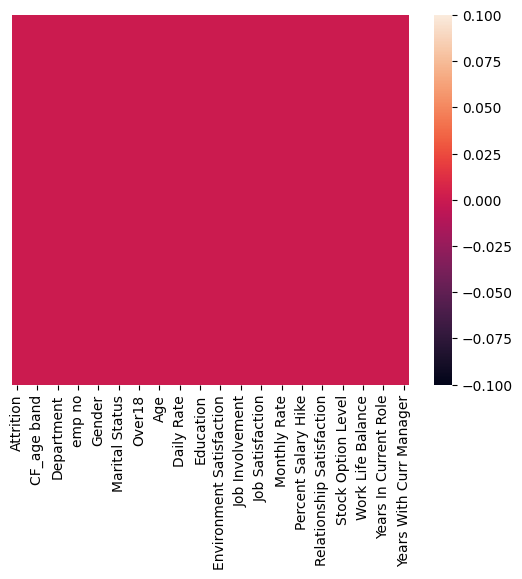

In [8]:
sb.heatmap(dataset.isna(), yticklabels= False)

**f) Key Performance Indicators (KPI)**

**1) Total number of employees.**

In [27]:
Employee_Count = dataset['Employee Count'].value_counts()

In [30]:
Employee_Count

Employee Count
1    1470
Name: count, dtype: int64

**2) Attrition Count**

In [7]:
Attrition_Count = dataset.groupby(['Attrition']).size().reset_index(name='Attrition Count').query('Attrition == "Yes"')

In [8]:
Attrition_Count

,Attrition,Attrition Count
1,Yes,237


**3) Active Employee**

In [9]:
Active_Employee = dataset.groupby(['Attrition']).size().reset_index(name='Active Employee').query('Attrition == "No"')

In [10]:
Active_Employee

,Attrition,Active Employee
0,No,1233


**4) Attrition By Gender**

In [11]:
Attrition_by_Gender = dataset.groupby(['Attrition','Gender']).size().reset_index().query('Attrition == "Yes"')

In [12]:
Attrition_by_Gender

,Attrition,Gender,0
2,Yes,Female,87
3,Yes,Male,150


**5) Attrition Rate**

In [17]:
Attrition_Rate= (Attrition_Count['Attrition Count']/ Employee_Count)*100

In [18]:
Attrition_Rate

1    16.122449
dtype: float64

**g) Describing Statistical Summary of dataset**

In [19]:
dataset.describe()

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,65.891156,2.729932,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,20.329428,0.711561,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**From here we can see the statistical summaries of the numerical data in the dataset.**

**1.The average age of the employees in the dataset is 36.92.** 

**2.The average environment satisfation rating 2.72 and average hourly rate is 65.89.** 

**3.Most of the columns are self-explanatory,according to the sources of the dataset,for ratings,a higher number means a higher rating/satisfaction.**

**h) Check for Duplicated & Unique values in the dataset.**

In [20]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [21]:
for i in dataset.columns:
    print(f"{i}: Number of unique values {dataset[i].nunique()}")
    print("==========================================================")

Attrition: Number of unique values 2
Business Travel: Number of unique values 3
CF_age band: Number of unique values 5
CF_attrition label: Number of unique values 2
Department: Number of unique values 3
Education Field: Number of unique values 6
emp no: Number of unique values 1470
Employee Number: Number of unique values 1470
Gender: Number of unique values 2
Job Role: Number of unique values 9
Marital Status: Number of unique values 3
Over Time: Number of unique values 2
Over18: Number of unique values 1
Training Times Last Year: Number of unique values 7
Age: Number of unique values 43
CF_current Employee: Number of unique values 2
Daily Rate: Number of unique values 886
Distance From Home: Number of unique values 29
Education: Number of unique values 5
Employee Count: Number of unique values 1
Environment Satisfaction: Number of unique values 4
Hourly Rate: Number of unique values 71
Job Involvement: Number of unique values 4
Job Level: Number of unique values 5
Job Satisfaction: N

**We notice that**

**1) Employee Count, Over18, Standard Hours have only one unique values.**

**2) Employee Number, emp no has 1470 unique values which simply represent the employee Id.**

**3) CF_attrition label & CF_current Employee have only 2 unique values which shows the current and ex-employee of our company.**

**These columns aren't useful for us, So we are going to drop these columns.**

**Univariate Analysis**

**1) Attrition**

In [22]:
Attrition_Count = dataset.groupby(['Attrition']).size().reset_index(name='Attrition Count').query('Attrition == "Yes"')

In [23]:
Attrition_Count.values

array([['Yes', 237]], dtype=object)

C:\Users\pc\AppData\Local\Temp\ipykernel_11992\3807240880.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=dataset['Attrition'],orient='h',palette='viridis')


<Axes: xlabel='Attrition', ylabel='count'>

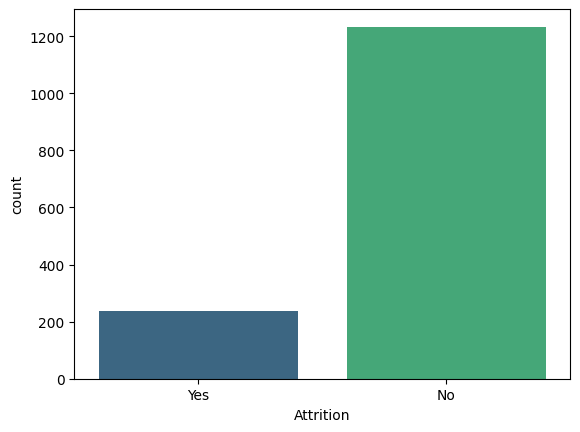

In [24]:
sb.countplot(x=dataset['Attrition'],orient='h',palette='viridis')

**Bivariate Analysis**

**Data Preparation**

**1) Drop Columns which do not add value**

In [25]:
dataset.drop(['Employee Count','Employee Number','Over18','Standard Hours','emp no','CF_attrition label','CF_current Employee'],axis=1,inplace=True)

In [26]:
dataset.shape

(1470, 32)

**2) Converting Categorical Variables To Binary**

**Attrition field has values Yes/No, however for machin learning algorithms we need numeric values. Hence translating Yes/No to binary 1/0.**

In [27]:
dataset['Attrition'] = dataset['Attrition'].map({'Yes':1, 'No':0})
dataset.head()

,Attrition,Business Travel,CF_age band,Department,Education Field,Gender,Job Role,Marital Status,Over Time,Training Times Last Year,...,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Travel_Rarely,35 - 44,Sales,Life Sciences,Female,Sales Executive,Single,Yes,0,...,11,3,1,0,8,1,6,4,0,5
1,0,Travel_Frequently,45 - 54,R&D,Life Sciences,Male,Research Scientist,Married,No,3,...,23,4,4,1,10,3,10,7,1,7
2,1,Travel_Rarely,35 - 44,R&D,Other,Male,Laboratory Technician,Single,Yes,3,...,15,3,2,0,7,3,0,0,0,0
3,0,Travel_Frequently,25 - 34,R&D,Life Sciences,Female,Research Scientist,Married,Yes,3,...,11,3,3,0,8,3,8,7,3,0
4,0,Travel_Rarely,25 - 34,R&D,Medical,Male,Laboratory Technician,Married,No,3,...,12,3,4,1,6,3,2,2,2,2


**Converting Categorical Variables to Numerical Using get_dummies Method**

In [28]:
dummies_df = pd.get_dummies(dataset,drop_first=True,dtype=int,columns=['Business Travel','CF_age band','Department','Education Field','Gender',
                                                                       'Job Role','Marital Status','Over Time','Education'])
dummies_df.head(3)

,Attrition,Training Times Last Year,Age,Daily Rate,Distance From Home,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,...,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Marital Status_Married,Marital Status_Single,Over Time_Yes,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
0,1,0,41,1102,1,2,94,3,2,4,...,0,1,0,0,1,1,0,0,0,0
1,0,3,49,279,8,3,61,2,2,2,...,1,0,0,1,0,0,0,0,1,0
2,1,3,37,1373,2,4,92,2,1,3,...,0,0,0,0,1,1,0,0,0,0


**3) Separating the Independent and Dependent Matrix's**

In [29]:
X = dummies_df.drop(['Attrition'], axis=1)
y= dummies_df['Attrition']

**4) Scaling**

**Scaling is a method used to standardize the range of independent variables or features of data. Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.** 

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

**Data Preparation**

**Split the data into Training set and Testing set**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.shape

(1176, 51)

In [33]:
y_train.shape

(1176,)

In [34]:
y_test.shape

(294,)

In [35]:
X_test.shape

(294, 51)

**Modelling**

**1) Logistic Regression**

**Import sklearn and create an object of Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

**Fit and Predict the model (training and testing)**

In [37]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred=classifier.predict(X_test)

In [39]:
y_test

442     0
1091    0
981     1
785     0
1332    0
       ..
1439    1
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

**Evaluate Performance of Model**

**Test the Model**

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test,y_pred)

In [41]:
cm

array([[233,   7],
       [ 29,  25]], dtype=int64)

**Calculate the accuracy_score**

In [42]:
accuracy_score(y_test,y_pred)

0.8775510204081632

**2) Decision Tree Classifier**

**Import sklearn and create an object of Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
c = DecisionTreeClassifier()

**Fit and Predict the model (training and testing)**

In [44]:
c.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = c.predict(X_test)

In [46]:
y_test

442     0
1091    0
981     1
785     0
1332    0
       ..
1439    1
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

**Evaluate Performance of Model**

**Test the Model**

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

In [48]:
cm

array([[219,  21],
       [ 33,  21]], dtype=int64)

**Calculate the accuracy_score**

In [49]:
accuracy_score(y_test,y_pred)

0.8163265306122449

**3) Random Forest Classifier**

**Import sklearn and create an object of Random Forest Classifier**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

**Fit and Predict the model (training and testing)**



In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [52]:
y_pred=rfc.predict(X_test)

In [53]:
y_test

442     0
1091    0
981     1
785     0
1332    0
       ..
1439    1
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

**Evaluate Performance of Model**

**Test the Model**

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,roc_curve
cm = confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[238,   2],
       [ 51,   3]], dtype=int64)

**Calculate the accuracy_score**

In [56]:
accuracy_score(y_test,y_pred)

0.8197278911564626

In [57]:
rf = roc_auc_score(y_test, y_pred)

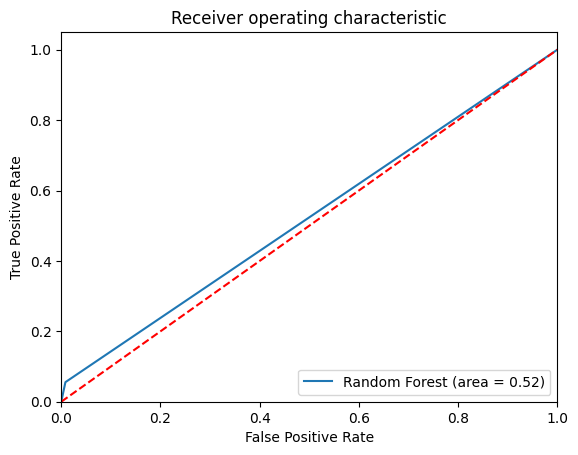

In [58]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,y_pred)
plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [ ]:
# Create Multiple Sheet in Excel By using openpyxsl 

In [32]:
file_path = 'C:\\Users\\pc\\Desktop\\hr_dataset.xlsx'

In [33]:
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    dataset.to_excel(writer, sheet_name='Sheet1', index=False)
    Employee_Count.to_excel(writer, sheet_name='Sheet2', index=False)
    Attrition_Count.to_excel(writer, sheet_name='Sheet3', index=False)
    Active_Employee.to_excel(writer, sheet_name='Sheet4', index=False)
    Attrition_Rate.to_excel(writer, sheet_name='Sheet5',index=False)
    Attrition_by_Gender.to_excel(writer, sheet_name='Sheet6', index=False)